$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 2 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
import sklearn
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

----------------------------

# `02` Load Data

In [3]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

Hint: You can use `sklearn.model_selection.train_test_split` function

In [4]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [5]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

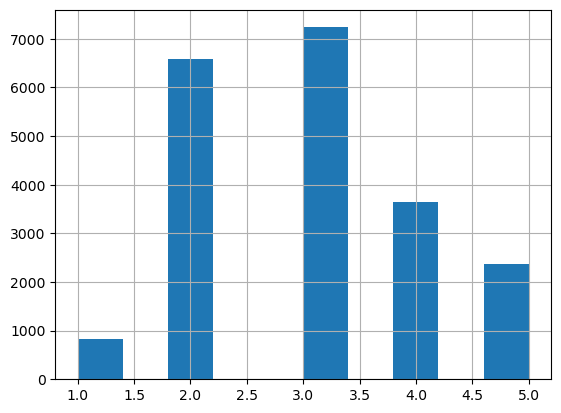

In [6]:
housing["income_cat"].hist()

In [7]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=1234, stratify=housing["income_cat"] )

In [8]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Note:` Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

In [9]:
housing = strat_train_set.copy()

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16353.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582609,35.649442,28.581819,2633.363433,536.950223,1423.043120,498.423874,3.869945,206820.528646
std,2.008893,2.149595,12.590900,2177.437611,418.651626,1125.594674,379.073484,1.903118,115548.367872
min,-124.350000,32.540000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1453.000000,297.000000,787.000000,280.000000,2.559200,119700.000000
50%,-118.510000,34.260000,29.000000,2125.500000,434.000000,1164.000000,409.500000,3.533800,179700.000000
75%,-118.010000,37.720000,37.000000,3141.250000,644.000000,1721.000000,602.000000,4.747275,265300.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [11]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
11485    -118.06     33.82                24.0       3983.0           675.0   
8726     -118.14     34.09                28.0       4164.0          1127.0   
3512     -121.80     37.35                27.0       2358.0           415.0   
17128    -118.30     34.09                32.0       2202.0           674.0   
10519    -116.00     32.74                26.0       1134.0           280.0   
...          ...       ...                 ...          ...             ...   
12954    -122.23     37.79                30.0        999.0           264.0   
4016     -118.15     34.21                34.0       2765.0           515.0   
16100    -118.12     34.07                43.0       1050.0           252.0   
11542    -117.70     34.00                15.0       4905.0           711.0   
9833     -117.69     33.54                20.0       1767.0           280.0   

       population  

In [12]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11485,-118.06,33.82,24.0,3983.0,675.0,1568.0,638.0,4.6458,213400.0,<1H OCEAN
8726,-118.14,34.09,28.0,4164.0,1127.0,2934.0,1014.0,2.7483,218800.0,<1H OCEAN
3512,-121.80,37.35,27.0,2358.0,415.0,1562.0,383.0,5.2297,192800.0,<1H OCEAN
17128,-118.30,34.09,32.0,2202.0,674.0,2178.0,635.0,2.0307,226700.0,<1H OCEAN
10519,-116.00,32.74,26.0,1134.0,280.0,329.0,158.0,1.4338,43900.0,INLAND


In [13]:
len(strat_train_set)

16512

In [14]:
len(strat_test_set)

4128

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Note:` Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

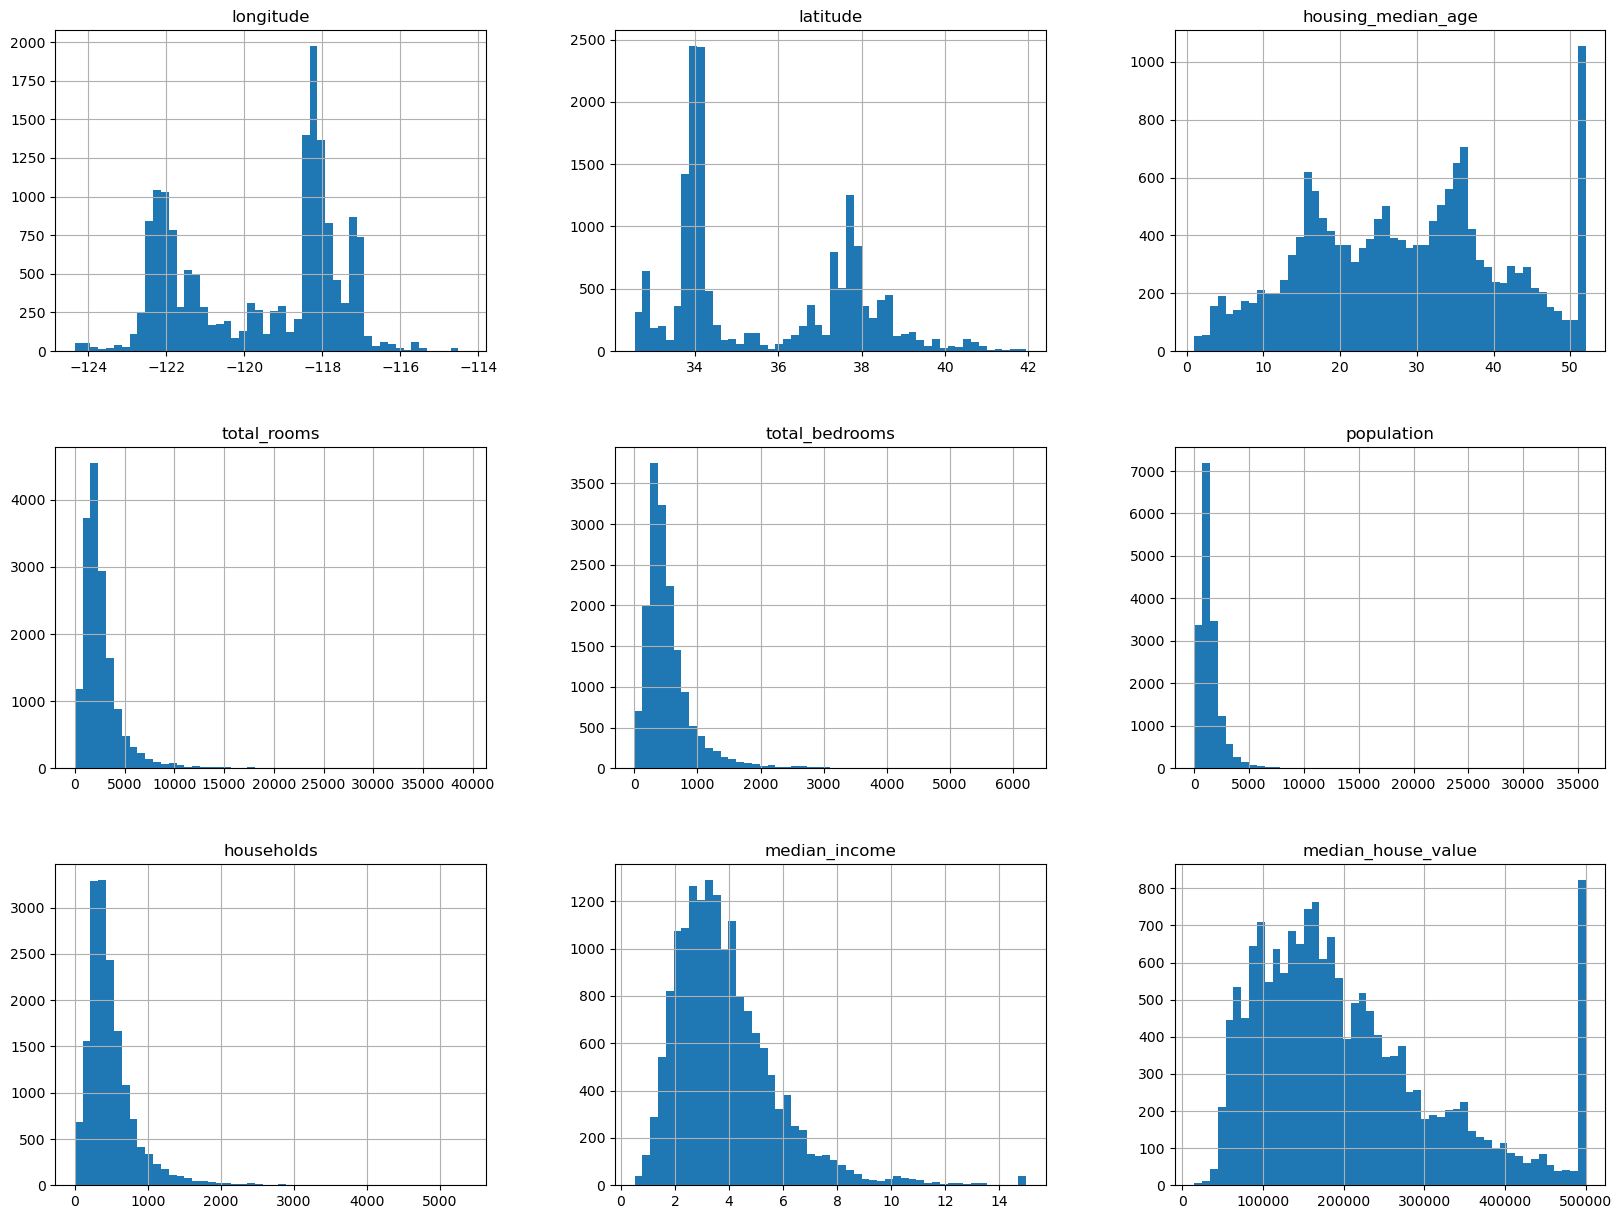

In [15]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

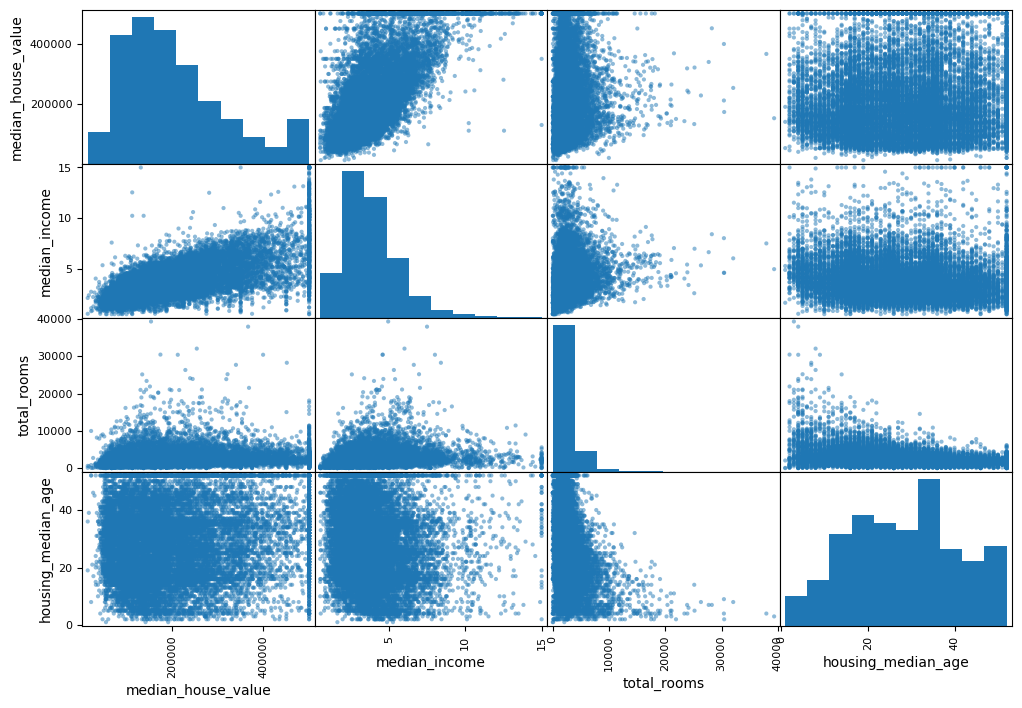

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, etc. as needed to make sure it's ready for the model.

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11485,-118.06,33.82,24.0,3983.0,675.0,1568.0,638.0,4.6458,213400.0,<1H OCEAN
8726,-118.14,34.09,28.0,4164.0,1127.0,2934.0,1014.0,2.7483,218800.0,<1H OCEAN
3512,-121.80,37.35,27.0,2358.0,415.0,1562.0,383.0,5.2297,192800.0,<1H OCEAN
17128,-118.30,34.09,32.0,2202.0,674.0,2178.0,635.0,2.0307,226700.0,<1H OCEAN
10519,-116.00,32.74,26.0,1134.0,280.0,329.0,158.0,1.4338,43900.0,INLAND


In [15]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [16]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14067,-117.17,32.75,52.0,1052.0,NaN,381.0,201.0,3.0726,NEAR OCEAN
5569,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,<1H OCEAN
12681,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,INLAND
15349,-117.91,33.76,20.0,4413.0,NaN,4818.0,1063.0,2.8594,<1H OCEAN
19405,-121.89,37.44,8.0,2534.0,NaN,1527.0,364.0,7.8532,<1H OCEAN


In [17]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # imputing NAN with Median

In [18]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14067,-117.17,32.75,52.0,1052.0,434.0,381.0,201.0,3.0726,NEAR OCEAN
5569,-118.16,34.01,40.0,1552.0,434.0,1919.0,427.0,2.2596,<1H OCEAN
12681,-122.48,38.50,37.0,3049.0,434.0,1287.0,439.0,4.3125,INLAND
15349,-117.91,33.76,20.0,4413.0,434.0,4818.0,1063.0,2.8594,<1H OCEAN
19405,-121.89,37.44,8.0,2534.0,434.0,1527.0,364.0,7.8532,<1H OCEAN


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [20]:
housing_num = housing.select_dtypes(include=[np.number])

In [21]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [22]:
X = imputer.transform(housing_num)

In [23]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [24]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11485,-118.06,33.82,24.0,3983.0,675.0,1568.0,638.0,4.6458
8726,-118.14,34.09,28.0,4164.0,1127.0,2934.0,1014.0,2.7483
3512,-121.80,37.35,27.0,2358.0,415.0,1562.0,383.0,5.2297
17128,-118.30,34.09,32.0,2202.0,674.0,2178.0,635.0,2.0307
10519,-116.00,32.74,26.0,1134.0,280.0,329.0,158.0,1.4338


In [25]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
11485,<1H OCEAN
8726,<1H OCEAN
3512,<1H OCEAN
17128,<1H OCEAN
10519,INLAND
4559,<1H OCEAN
1115,<1H OCEAN
14362,INLAND
4336,<1H OCEAN
12636,NEAR OCEAN


In [26]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [27]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [28]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
housing_cat_1hot.shape

(16512, 5)

In [30]:
housing_tr.shape

(16512, 8)

In [31]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [33]:
housing_num_tr

array([[ 0.75795743, -0.85108953, -0.36391028, ...,  0.12878639,
         0.3682145 ,  0.40768797],
       [ 0.71813329, -0.72548066, -0.04621091, ...,  1.34240386,
         1.36013665, -0.58939042],
       [-1.10382111,  0.79113016, -0.12563575, ...,  0.12345571,
        -0.30449866,  0.71450962],
       ...,
       [ 0.72808932, -0.73478502,  1.14516176, ..., -0.53577135,
        -0.67119329, -0.96946252],
       [ 0.93716605, -0.76735029, -1.07873389, ...,  1.14428036,
         0.69533776,  0.96274141],
       [ 0.94214407, -0.98135059, -0.68160966, ..., -0.55265183,
        -0.56566966,  1.40271703]])

In [34]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [35]:
housing_prepared

array([[ 0.75795743, -0.85108953, -0.36391028, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71813329, -0.72548066, -0.04621091, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10382111,  0.79113016, -0.12563575, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.72808932, -0.73478502,  1.14516176, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93716605, -0.76735029, -1.07873389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94214407, -0.98135059, -0.68160966, ...,  0.        ,
         0.        ,  0.        ]])

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [49]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

----------------------------

# `05` Normal Equation

Using `sklearn` implementation of the linear regression closed-form solution, i.e. normal equation, to model the data.

Hint: Look for `sklearn.linear_model.LinearRegression` class.

## `i` Model Training

Initializing the model, fitting it to the training data, and get a fitted model.

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

## `ii` Model Evaluation

Evaluate model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [38]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68702.72245761025

In [39]:
lin_reg.score(housing_prepared, housing_labels)

0.6464534808379858

----------------------

# `06` Linear Regression with Gradient Descent

Using `sklearn` implementation of linear regression to model the data.

Hint: Look for `sklearn.linear_model.SGDRegressor` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
reg = make_pipeline(SGDRegressor(max_iter=1000,learning_rate='constant', eta0=0.01,tol=1e-3))
reg.fit(housing_prepared, housing_labels)

Pipeline(steps=[('sgdregressor', SGDRegressor(learning_rate='constant'))])

## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [41]:
from sklearn.metrics import mean_squared_error

housing_predictions = reg.predict(housing_prepared)
reg_mse = mean_squared_error(housing_labels, housing_predictions)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

70209.87255426976

In [42]:
reg.score(housing_prepared, housing_labels)

0.6307716486609162

## `iii` Tune `learning_rate`

Try different `learning_rate` values and evaluate. What is the optimal learning rate?

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [56]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression


housing_prepared, housing_labels = make_regression(n_samples=1000, n_features= 13, random_state=1234)
sgd_regressor = SGDRegressor()

param_grid = {'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0': [0.01, 0.1, 0.5]}

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(housing_prepared, housing_labels)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'invscaling'}
Best Negative Mean Squared Error: -0.0003064741417720525


## `iv` Regularization Mode: On

Let's try $l_1$ and $l_2$ regularization. Use default parameters for simplicity. Does regularization made the model generalize better?

Which of the two regularizations performs better?

In [57]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression


housing_prepared, housing_labels = make_regression(n_samples=1000,n_features= 13, random_state=1234)
sgd_regressor = SGDRegressor()

param_grid = {'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0': [0.01, 0.1, 0.5],
              'penalty': ['l1']
            }

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(housing_prepared, housing_labels)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'invscaling', 'penalty': 'l1'}
Best Negative Mean Squared Error: -9.858153322570162e-08


In [53]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression


housing_prepared, housing_labels = make_regression(n_samples=1000, random_state=1234)
sgd_regressor = SGDRegressor()

param_grid = {'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0': [0.01, 0.1, 0.5],
              'penalty': ['l2']
            }

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(housing_prepared, housing_labels)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'alpha': 0.0001, 'eta0': 0.5, 'learning_rate': 'adaptive', 'penalty': 'l2'}
Best Negative Mean Squared Error: -0.000347810890494159


In [58]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression


housing_prepared, housing_labels = make_regression(n_samples=1000,n_features= 13, random_state=1234)
sgd_regressor = SGDRegressor()

param_grid = {'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0': [0.01, 0.1, 0.5],
              'penalty': ['l1','l2']
            }

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(housing_prepared, housing_labels)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'penalty': 'l1'}
Best Negative Mean Squared Error: -1.0683691946310726e-07


------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [59]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [60]:
final_predictions

array([  9.45369222,   8.12120078, 322.91215234, ..., -12.80637618,
       425.98995533, -61.90946116])

In [61]:
final_mse

55989962771.13808

In [62]:
final_rmse

236621.98285691478

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [65]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    (' GridSearchCV', GridSearchCV(grid_search.best_params_, param_grid=param_grid))
])

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$